In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 500)

import os
import simplejson as json

from robobrowser import RoboBrowser

In [4]:
# Download html, return failed urls
def download_articles(df_sources):
    df_errors = pd.DataFrame(columns=["id","url"])
    chrome_user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36'

    for url in df_sources.iterrows():
        page_id = url[1]['id']
        html_file = "2015-09_wikitimes_CEP_articles/"+page_id+".html"
        if (os.path.isfile(html_file)):
            continue
        try:
            browser = RoboBrowser(user_agent=chrome_user_agent, tries=3)                                             
            browser.open(url[1]['url'])       
            with open(html_file, "w") as html:
                html.write(browser.response.content.decode('utf-8'))
        except Exception as e:
            print("* Error:", page_id, url[1]['url'])
            df_errors = df_errors.append({'id':page_id, 'url':url[1]['url']}, ignore_index=True)
            print(e)
    return df_errors

In [3]:
df_wiki_events = pd.read_json('2015-09_wikitimes_CEP.json')
print (len(df_wiki_events), "events")

428 events


In [4]:
df_wiki_events.head(1)

,belongsToStory,category,date,description,entity,id,source
0,"{'wikipediaUrl': 'http://en.wikipedia.org/wiki/Destruction_of_cultural_heritage_by_ISIL', 'name': 'Destruction of cultural heritage by ISIL', 'id': '1894'}","{'name': 'War_Conflict', 'id': '2'}",2015-09-01,"The United Nations confirms the Islamic State of Iraq and the Levant has completely destroyed the Temple of Bel in Palmyra, Syria, after earlier reports that the structure was mostly intact.","[{'name': 'United Nations', 'id': '17', 'wikiURL': 'http://en.wikipedia.org/wiki/United_Nations'}, {'name': 'Syria', 'id': '147', 'wikiURL': 'http://en.wikipedia.org/wiki/Syria'}, {'name': 'Islamic State of Iraq and the Levant', 'id': '47034', 'wikiURL': 'http://en.wikipedia.org/wiki/Islamic_State_of_Iraq_and_the_Levant'}, {'name': 'Palmyra', 'id': '49507', 'wikiURL': 'http://en.wikipedia.org/wiki/Palmyra'}, {'name': 'Temple of Bel', 'id': '52971', 'wikiURL': 'http://en.wikipedia.org/wiki/Te...",56657,"[{'url': 'http://www.bbc.com/news/world-middle-east-34111092', 'type': 'article', 'id': '74033', 'sourceName': 'BBC'}, {'url': 'http://www.aljazeera.com/news/2015/08/confirms-destruction-famed-palmyra-temple-150831230110476.html', 'type': 'article', 'id': '74034', 'sourceName': 'Al Jazeera English Online'}]"


In [5]:
df_sources = pd.DataFrame(columns=['event','sourceName', 'type', 'url', 'id'])

for event in df_wiki_events.iterrows():
    urls = event[1]['source']
    for url in urls:
        url['event'] = event[0]
        df_sources = df_sources.append(url, ignore_index=True)

In [6]:
print (len(df_sources['id'].unique()), "News Articles")
df_sources.head(2)

606 News Articles


,event,sourceName,type,url,id
0,0.0,BBC,article,http://www.bbc.com/news/world-middle-east-34111092,74033
1,0.0,Al Jazeera English Online,article,http://www.aljazeera.com/news/2015/08/confirms-destruction-famed-palmyra-temple-150831230110476.html,74034


In [30]:
#Download Pages:
df_errors = download_articles(df_sources)

* Error: 74105 http://www.turkishweekly.net/2015/09/03/news/two-british-journalists-held-on-terror-charge-released/
* Error: 74237 http://www.daijiworld.com/news/news_disp.asp?n_id=352918
* Error: 74382 http://yosemite.epa.gov/opa/admpress.nsf/d0cf6618525a9efb85257359003fb69d/dfc8e33b5ab162b985257ec40057813b!opendocument
* Error: 74448 http://w.worldwideherald.com/yourls-go.php?id=qsjt0
* Error: 74545 http://www.maltatoday.com.mt/news/world/57544/libyan_human_trafficker_reportedly_killed_by_italian_commandos#.VgaOr5dSJFQ


In [ ]:
# TODO: better way to retry failed articles, replace dead links.
# df_errors2 = download_articles(df_errors) ...

Unique Publishers: 261 Unique Articles: 606
Top 50 cited publishers cover 384 articles 63.37 %


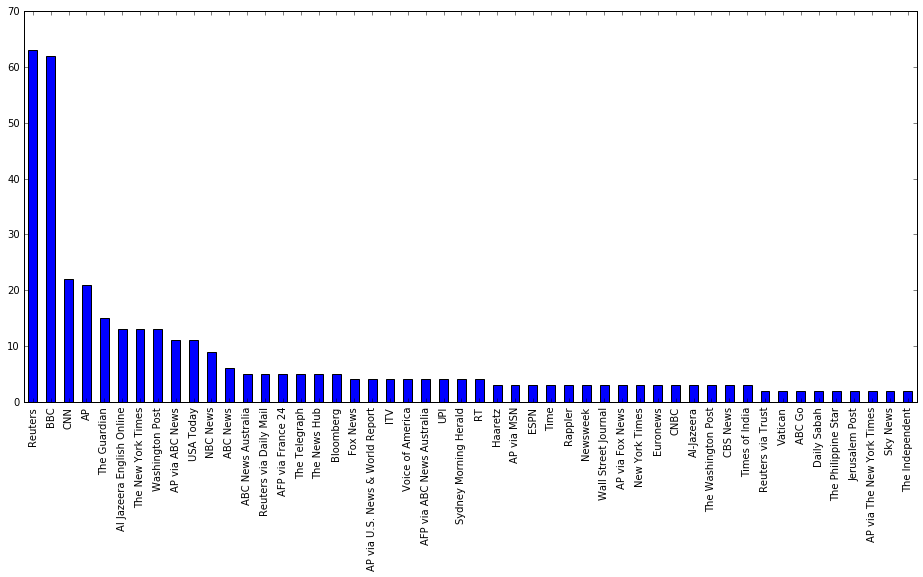

In [27]:
# Top cited sources by publication:
topN = 50

print("Unique Publishers:", 
      len(df_sources['sourceName'].unique()), 
      "Unique Articles:", 
      len(df_sources['id'].unique()))

df_sources['sourceName'].value_counts().head(topN).plot(kind='bar', figsize=(16,7))

topNSources = list(df_sources['sourceName'].value_counts().head(topN).index)
articles = len(df_sources['id'].unique())
cover = len(df_sources[df_sources['sourceName'].isin(topNSources)])

print("Top", topN, "cited publishers cover", cover, "articles", np.round((cover / articles) * 100, 2), "%")